In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from scipy import stats
sns.set()

In [13]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [14]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [16]:
print(train.shape,test.shape)

(1460, 81) (1459, 80)


In [17]:
print(train.columns, test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#EDA

In [36]:
train_total_rows = train.shape[0]
test_total_rows = test.shape[0]

concat = pd.concat([train,test]).reset_index(drop=True)
concat.drop(['SalePrice'],axis=1,inplace=True)
print(train.shape)
print(test.shape)
print(concat.shape)

(1460, 81)
(1459, 80)
(2919, 80)


In [19]:
concat_na = (concat.isna().sum() / len(concat))*100
concat_na = concat_na.sort_values(ascending=False)
concat_na = concat_na.drop(concat_na[concat_na==0].index)
nan_values = pd.DataFrame({'NaN %':concat_na})
nan_values.head()

,NaN %
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797


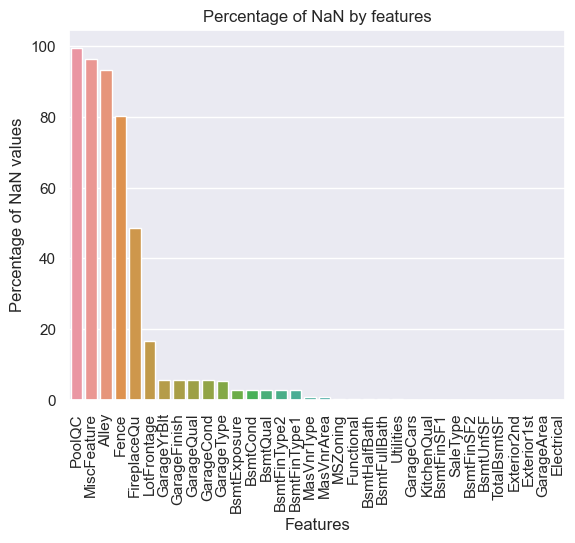

In [20]:
sns.barplot(data=nan_values,x=nan_values.index,y='NaN %')
plt.xlabel('Features')
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN by features')
plt.xticks(rotation=90)
plt.show()

In [21]:
concat_full = concat.copy()
concat_full['PoolQC'].fillna('None',inplace=True)
nan_values

,NaN %
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [38]:
concat_full['MiscFeature'].fillna('None',inplace=True)
concat_full['Alley'].fillna('None',inplace=True)
concat_full['Fence'].fillna('None',inplace=True)
concat_full['FireplaceQu'].fillna('None',inplace=True)

In [22]:
concat_full["LotFrontage"] = concat_full.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    concat_full[col].fillna('None', inplace=True)

In [23]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    concat_full[col].fillna(0, inplace=True)

In [24]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType',):    
    concat_full[col].fillna('None', inplace=True)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtHalfBath', 'BsmtFullBath','MasVnrArea'):
    concat_full[col].fillna(0, inplace=True)

In [25]:
nan_values

,NaN %
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [26]:
concat_full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,None,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,None,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,None,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,None,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,None,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,None,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,None,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,None,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


In [31]:
for col in ('Electrical', 'Functional', 'Utilities','KitchenQual', 'Exterior1st', 'Exterior2nd','SaleType','MSZoning'):
    concat_full[col].fillna(concat_full[col].mode()[0], inplace=True)

In [37]:
concat_na = (concat_full.isna().sum() / len(concat_full))*100
concat_na = concat_na.sort_values(ascending=False)
concat_na = concat_na.drop(concat_na[concat_na==0].index)
nan_values = pd.DataFrame({'NaN %':concat_na})
nan_values.head()

,NaN %
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
GarageFinish,5.447071


In [39]:
train_full = concat_full[:train_total_rows]
train_full['SalePrice'] = train['SalePrice']
test_full = concat_full[train_total_rows:]

C:\Users\jasmi\AppData\Local\Temp\ipykernel_22196\1052480995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_full['SalePrice'] = train['SalePrice']


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

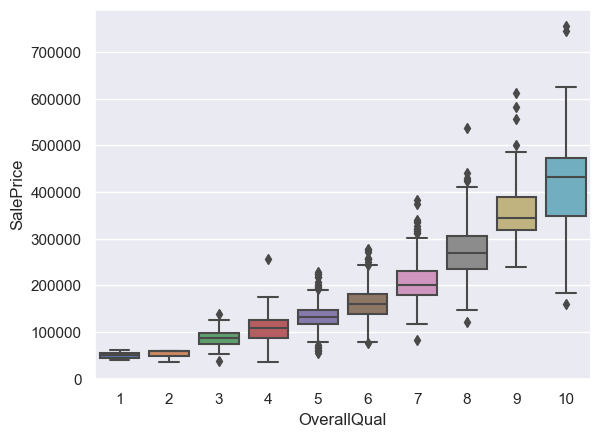

In [40]:
#outliers
sns.boxplot(data=train_full,y='SalePrice',x='OverallQual')

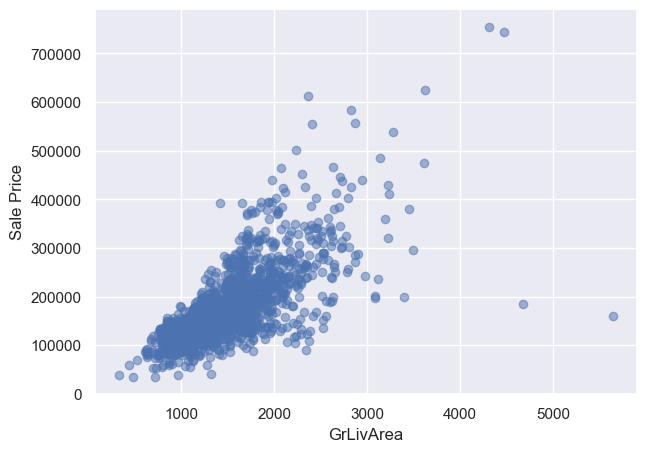

In [41]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(train_full['GrLivArea'],train_full['SalePrice'], alpha=0.5)
ax.set_ylabel('Sale Price')
ax.set_xlabel('GrLivArea')
plt.show()

In [42]:
train_full = train_full.drop(train_full[train_full['GrLivArea'] > 4000].index)

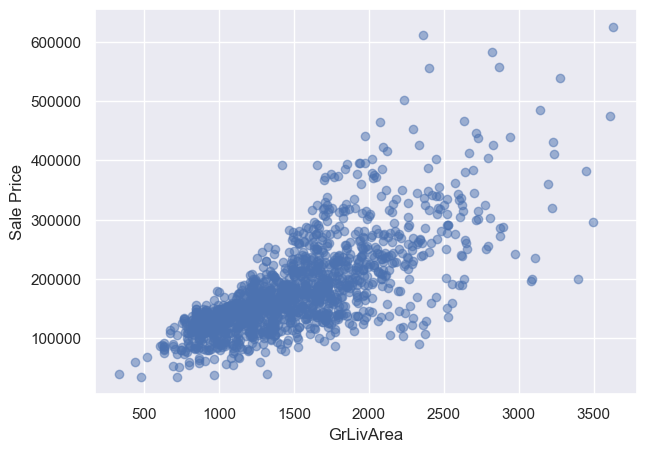

In [43]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(train_full['GrLivArea'],train_full['SalePrice'], alpha=0.5)
ax.set_ylabel('Sale Price')
ax.set_xlabel('GrLivArea')
plt.show()

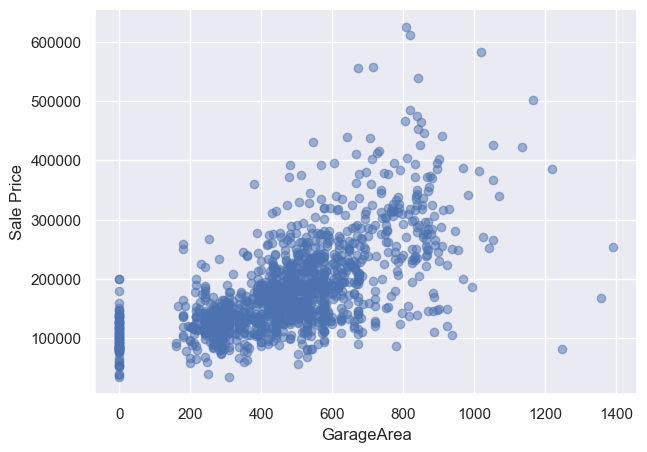

In [44]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(train_full['GarageArea'],train_full['SalePrice'], alpha=0.5)
ax.set_ylabel('Sale Price')
ax.set_xlabel('GarageArea')
plt.show()

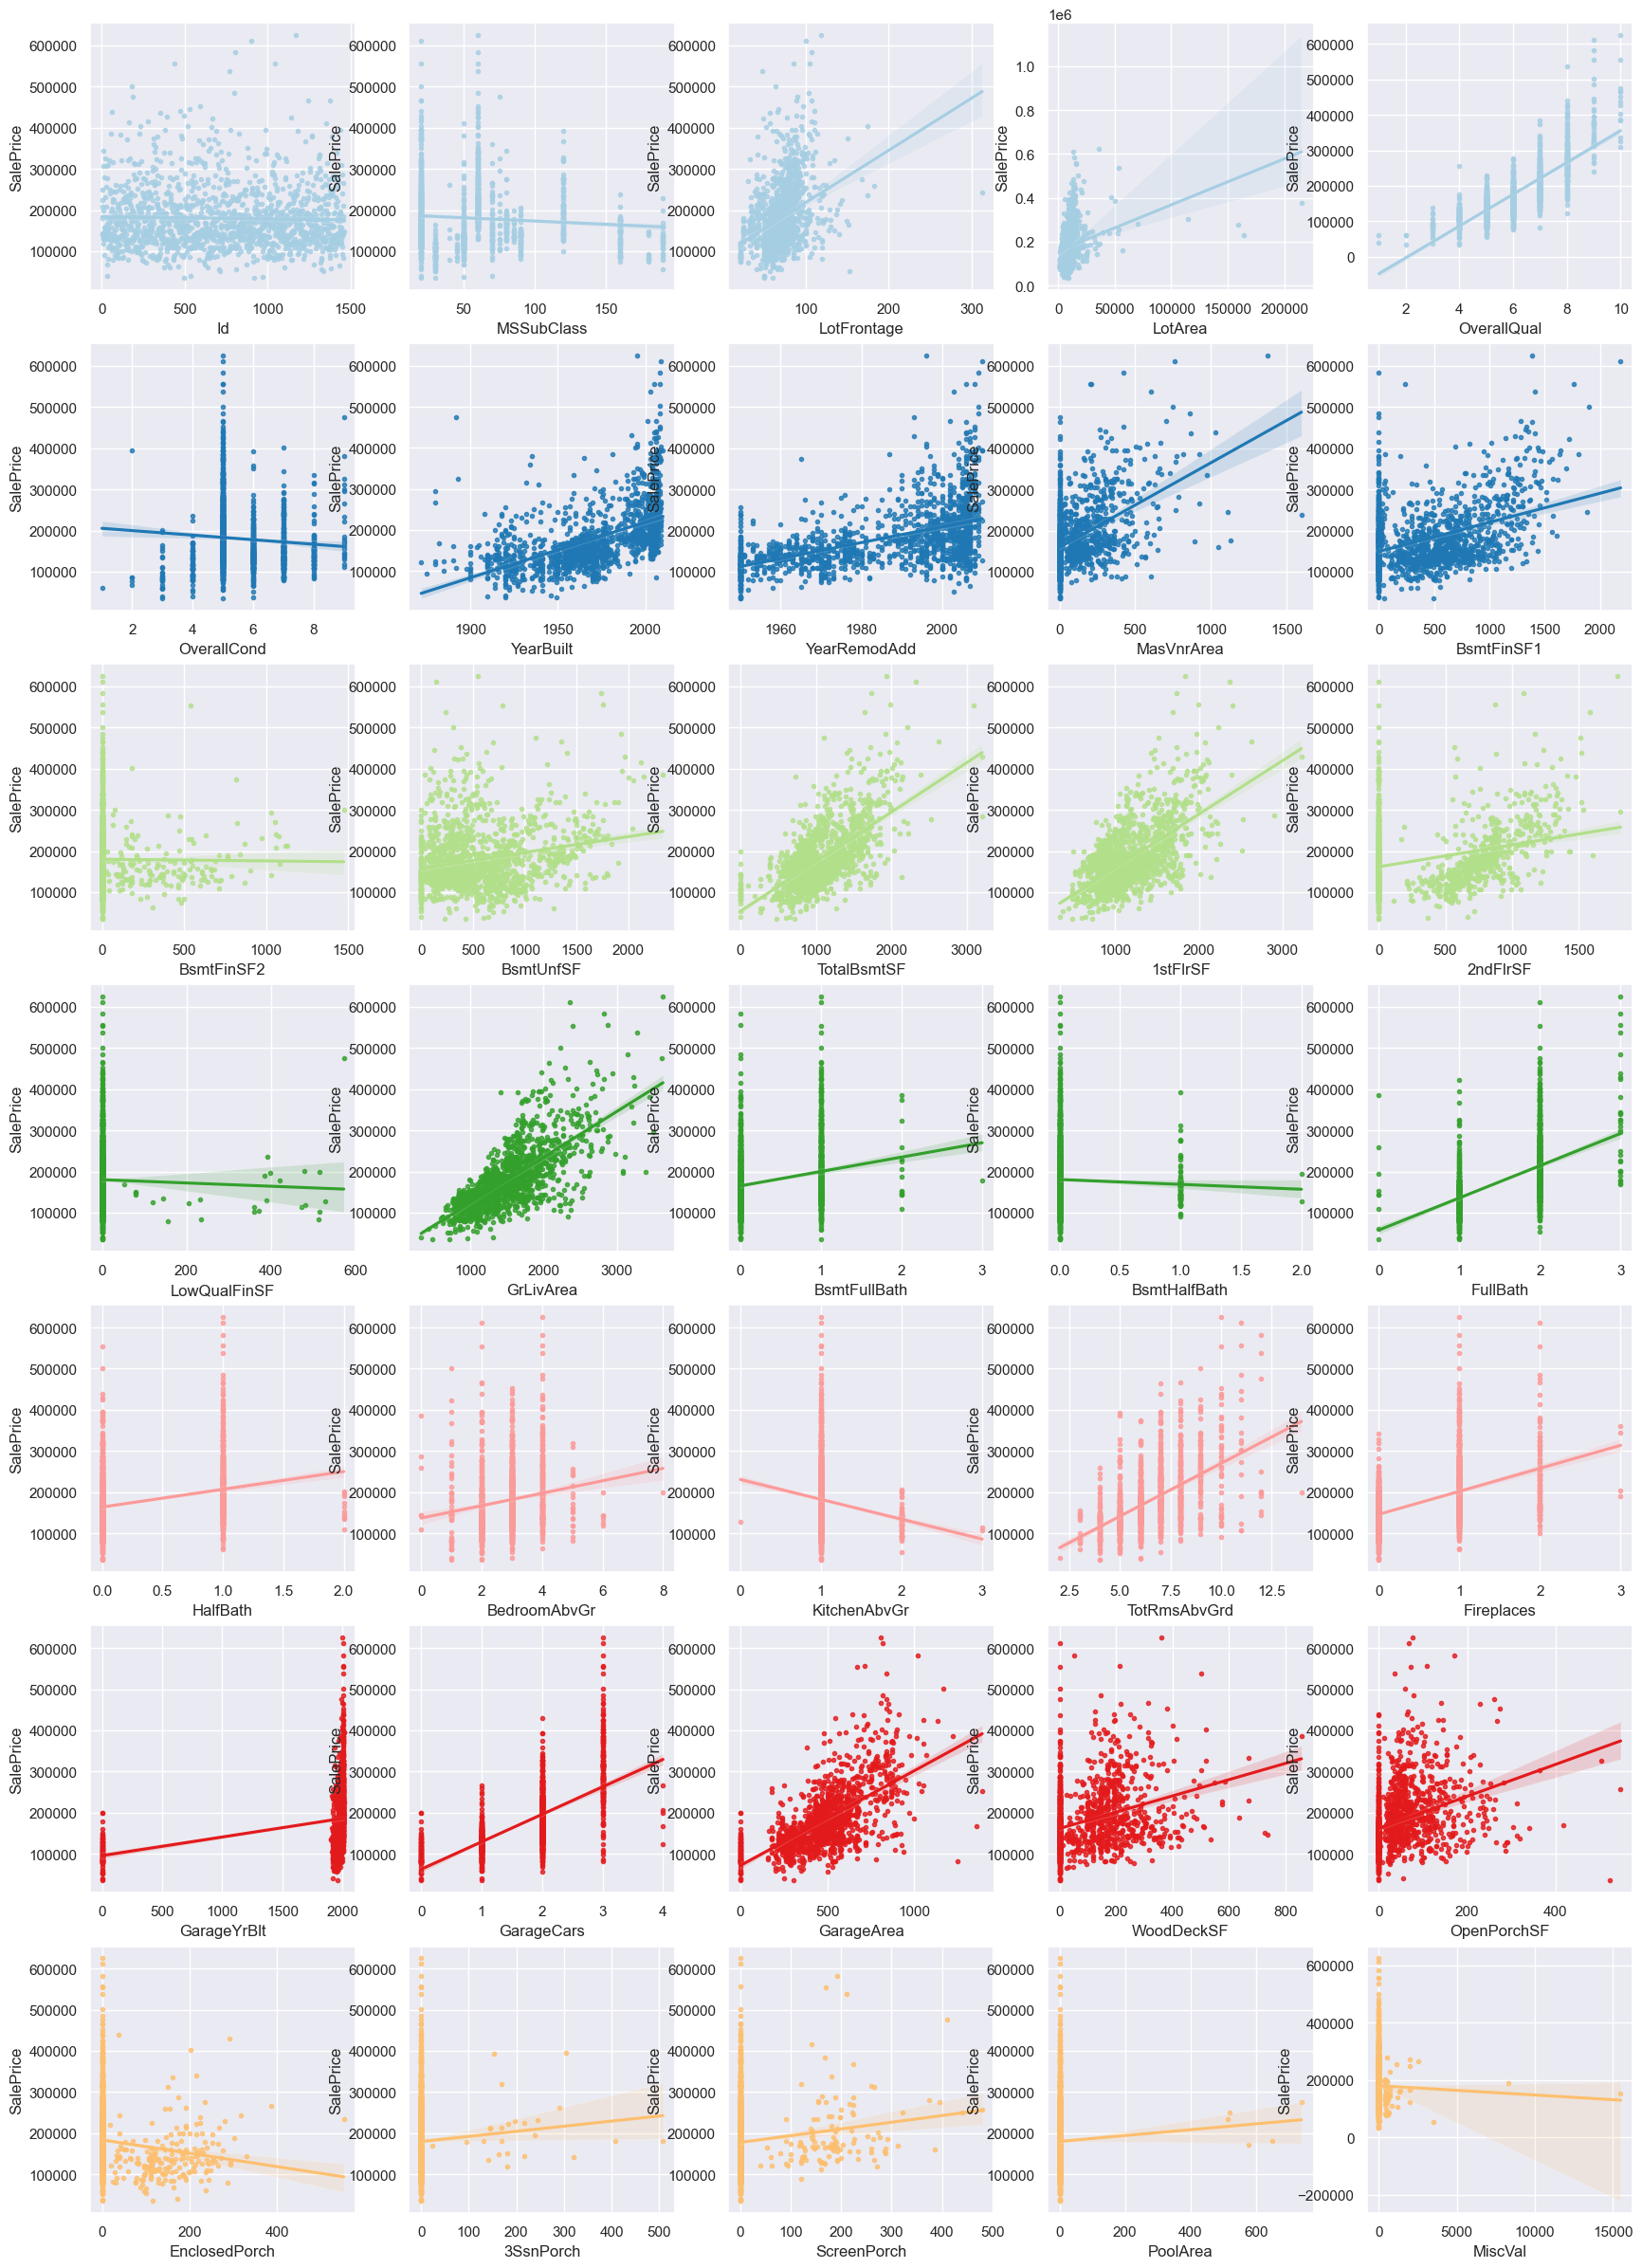

In [48]:
sns_rows = 7
sns_cols = 5
fig, axes = plt.subplots(sns_rows, sns_cols,figsize=(21,30))
palette= sns.color_palette("Paired", 10)

#train_full = train_full.drop(columns=['Id'])
num_features = train_full.dtypes[train_full.dtypes != "object"].index
num_list = list(num_features)

for num in range(0,sns_rows):
    for col in range(0, sns_cols):  
        i = num * sns_cols + col
        if i < len(num_list):
            sns.regplot(x=num_list[i],y='SalePrice',
            data = train_full, ax = axes[num][col],
            color = palette[num],marker=".")     
plt.show()   

C:\Users\jasmi\AppData\Local\Temp\ipykernel_22196\123730058.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train_full.corr()


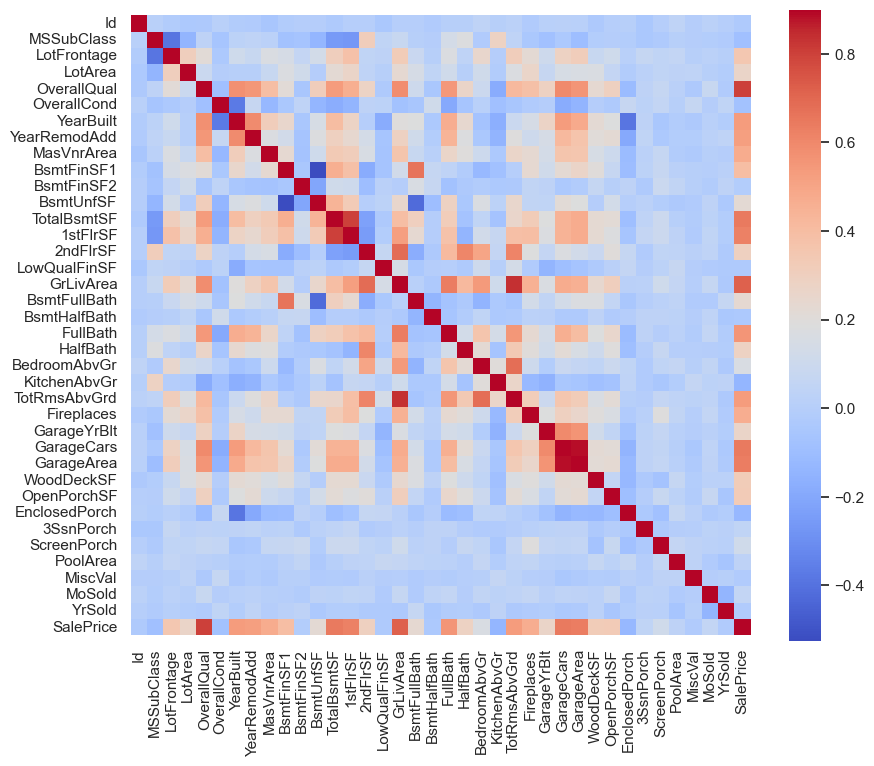

In [47]:
corrmat = train_full.corr()
with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corrmat, ax=ax, cbar_kws={"shrink": .82},vmax=.9, cmap='coolwarm', square=True)

In [49]:
from sklearn.preprocessing import LabelEncoder
data = train_full.copy()
categorical_features= data.select_dtypes(include=['object']).copy()
number=[len(data[features].unique()) for features in categorical_features]
data_tuples = list(zip(categorical_features,number))
categorical_data= pd.DataFrame(data_tuples, columns=['Features','Number of distinct values '])
categorical_data

,Features,Number of distinct values
0,MSZoning,5
1,Street,2
2,Alley,3
3,LotShape,4
4,LandContour,4
5,Utilities,2
6,LotConfig,5
7,LandSlope,3
8,Neighborhood,25
9,Condition1,9


In [50]:
for cat in categorical_features:
    label_encoder = LabelEncoder()
    label_encoder.fit(list(data[cat].values))
    data[cat] = label_encoder.transform(list(data[cat].values))
training_data=data.copy()

data = test_full.copy()
categorical_features = [features for features in data.columns if data[features].dtype == 'O']

for cat in categorical_features:
    label_encoder = LabelEncoder()
    label_encoder.fit(list(data[cat].values))
    data[cat] = label_encoder.transform(list(data[cat].values))
test_data=data.copy()

In [51]:
#Finding assumptions
def correlatedFeatures(correlation_data, threshold):
    feature=[]
    value=[]
    for i,index in enumerate(correlation_data.index):
        if abs(correlation_data[index]) > threshold:
            feature.append(index)
            value.append(correlation_data[index])
    df = pd.DataFrame(data=value,index=feature,columns=['Corr Value'])
    return df

In [52]:
corr_check = correlatedFeatures(training_data.corr()['SalePrice'],0.5)
corr_check.sort_values(by='Corr Value', ascending=False)

,Corr Value
SalePrice,1.000000
OverallQual,0.800858
GrLivArea,0.720516
GarageCars,0.649256
TotalBsmtSF,0.646584
GarageArea,0.636964
1stFlrSF,0.625235
FullBath,0.559048
TotRmsAbvGrd,0.537462
YearBuilt,0.535279


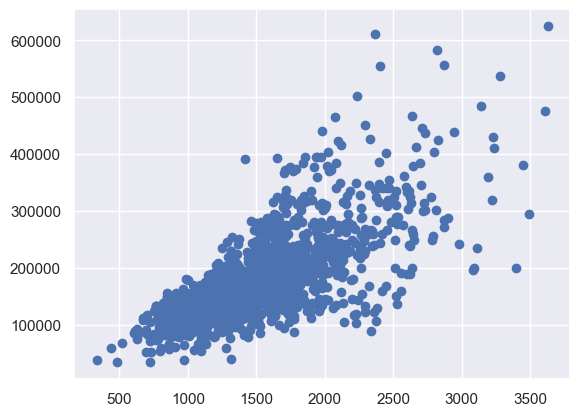

In [53]:
plt.scatter(training_data.GrLivArea, training_data.SalePrice);
plt.show()

Skewness: 1.565959
Kurtosis: 3.885283



C:\Users\jasmi\AppData\Local\Temp\ipykernel_22196\2009565569.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_data['SalePrice'] , fit=norm, ax=ax[0])


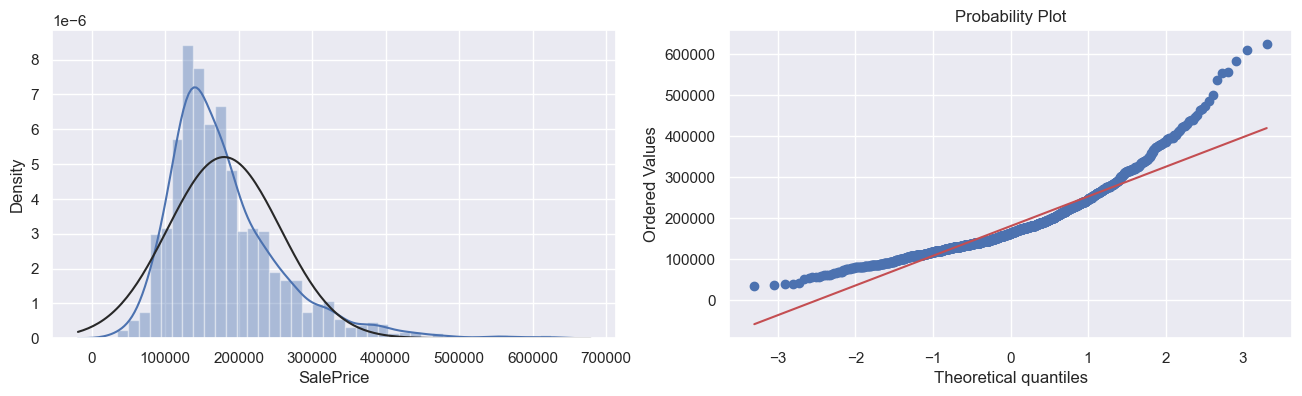

In [54]:
from scipy.stats import norm, skew
print("Skewness: %f" % training_data['SalePrice'].skew())
print("Kurtosis: %f" % training_data['SalePrice'].kurt())
print()
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.distplot(training_data['SalePrice'] , fit=norm, ax=ax[0])

res = stats.probplot(training_data['SalePrice'],plot=ax[1])
plt.show()

In [55]:
training_data['SalePrice'] = np.log(training_data['SalePrice'])

Skewness: 0.065449
Kurtosis: 0.666438



C:\Users\jasmi\AppData\Local\Temp\ipykernel_22196\1933994272.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_data['SalePrice'] , fit=norm, ax=ax[0])


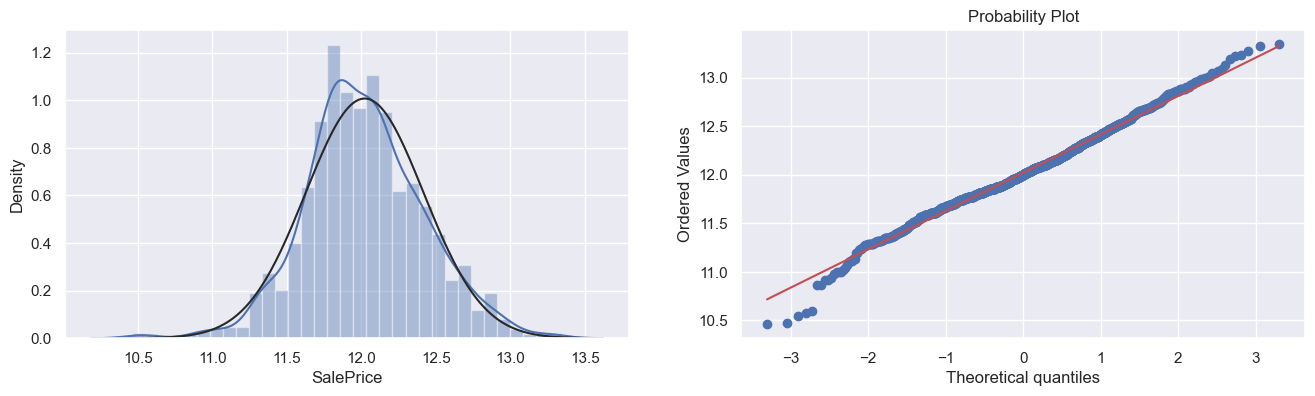

In [56]:
print("Skewness: %f" % training_data['SalePrice'].skew())
print("Kurtosis: %f" % training_data['SalePrice'].kurt())
print()
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.distplot(training_data['SalePrice'] , fit=norm, ax=ax[0])

res = stats.probplot(training_data['SalePrice'],plot=ax[1])
plt.show()

In [57]:
numeric_feats =training_data.dtypes[training_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = training_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Utilities,38.118246
MiscVal,24.418175
PoolArea,17.504556
Condition2,13.666839
LotArea,12.574590
3SsnPorch,10.279262
Heating,9.831083
LowQualFinSF,8.989291
RoofMatl,8.293646
MiscFeature,5.003955


In [58]:
skewness = skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewness.index
lambda_value = 0.15
for feat in skewed_features:
    training_data[feat] = boxcox1p(training_data[feat], lambda_value)
    
numeric_feats =test_data.dtypes[test_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = test_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]

skewed_features = skewness.index
lambda_value = 0.15
for feat in skewed_features:
    test_data[feat] = boxcox1p(test_data[feat], lambda_value)

In [59]:
final_data=training_data.copy()
final_data.drop(['SalePrice'],axis=1)
X_train=final_data
X_train= X_train.drop(['SalePrice'],axis=1)
y_train=training_data['SalePrice'].values
X_test=test_data

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1456, 80)
(1456,)
(1459, 80)


In [61]:
#model building
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score
from sklearn.linear_model import Ridge

def test_model(model, X_train=X_train,y_train=y_train):
    cv = KFold(n_splits=7,shuffle=True,random_state=42)
    r2= make_scorer(r2_score)
    r2_val_score = cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score= [r2_val_score.mean()]
    return score

In [62]:
#Ridgeregression
rr = Ridge(normalize=True, alpha = 0.5)
rr.fit(X_train,y_train)
test_model(rr)

TypeError: Ridge.__init__() got an unexpected keyword argument 'normalize'

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8)
dt.fit(X_train,y_train)
test_model(dt)

[0.7416509471672414]

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)
test_model(rf)

[0.8748945760987906]